<a href="https://colab.research.google.com/github/oviedof1/Machine-Learning/blob/master/Classify_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Description: Convolutional Neural Networks(CNN) to classify handwritten digits as number 0-9

#import the libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [5]:
#load the data and plit it into train set and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
#get the image shap
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
#take a look at the first image (at index=0) in the training data set
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
#print the image label
y_train[0]

5

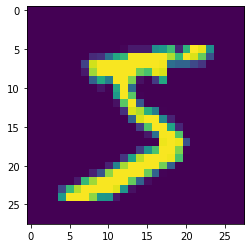

In [10]:
#show image as a picture
plt.imshow(x_train[0])

In [0]:
#reshape the data to fit the model
x_train = x_train.reshape(60000, 28, 28,1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [12]:
#one-hot encoding : Encode labels from 0-9
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print the new lable
y_train_one_hot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#build the CNN model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape = (28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#train the model
hist = model.fit(x_train, y_train_one_hot, validation_data=(x_test, y_test_one_hot), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 171s 3ms/step - loss: 0.2064 - accuracy: 0.9546 - val_loss: 0.0875 - val_accuracy: 0.9727
Epoch 2/3
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0676 - accuracy: 0.9798 - val_loss: 0.0858 - val_accuracy: 0.9732
Epoch 3/3
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0473 - accuracy: 0.9854 - val_loss: 0.1143 - val_accuracy: 0.9673


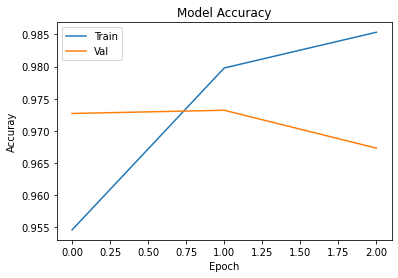

In [20]:
#visualize the model
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuray')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [23]:
#show predictions as probabilities for first 4 images of test set
predictions = model.predict(x_test[:4])
print(predictions)

[[1.3225114e-08 3.3678626e-12 3.6447611e-05 8.9826462e-06 9.3538888e-10
  3.2190724e-12 5.6739970e-13 9.9995363e-01 4.7577031e-10 9.2894703e-07]
 [2.4338440e-05 1.0116144e-04 9.9802738e-01 8.1099003e-08 1.6688733e-07
  7.0257528e-08 1.8464422e-03 2.2544382e-10 2.6281464e-07 4.6397837e-11]
 [5.0507615e-06 9.9939835e-01 2.9481375e-06 4.8504607e-08 9.9465928e-05
  3.5975765e-05 1.2268676e-05 8.7618202e-05 3.5820389e-04 2.3405599e-08]
 [9.9999940e-01 6.6242178e-13 1.3855071e-08 2.6691169e-12 1.0960299e-09
  1.5478412e-10 5.9042458e-07 1.7274079e-09 4.2168360e-10 2.1722256e-08]]


In [24]:
#print our predictions as number lables for the first 4 images
print(np.argmax(predictions, axis=1))

#print actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


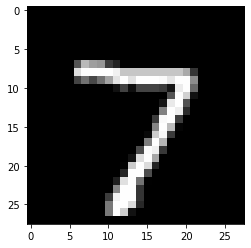

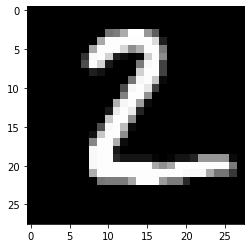

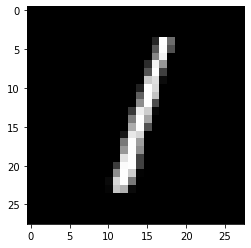

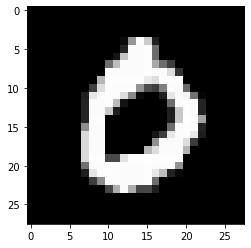

In [26]:
#show the first 4 images as pictures
for i in range(0,4):
  image = x_test[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()